<center><font size = "10"> Week 12 - Extracellular Response<center>
<center><font size = "8">Tutorial 02: LFPy <center>

An important use for libraries like LFPy - although too computationally heavy for noto - is to model the process of measuring extracellular potentials from brain circuits in-vivo. Extracellular potential measurements have various biases - like not consistently being able to distinguish different cells, recording more strongly from cells with particular electrophysioligal features, and not identifying the presence of cells which are silent. If you want to accurately replicate the results of a study that uses extracellular electrophysiology, it may be necessary to model the biases inherent in the measurement as well - which is where such a library comes in.

That is out of scope for today I am afraid. Instead we will be visualizing the fields that LFPy measures when a synapse is stimulated in hopes of getting an intuition for how these measurements work.

<font size='3'><font color='blue'> In this tutorial we see an example of using [LFPy](https://lfpy.readthedocs.io/en/latest/), a python package for calculation of extracellular potentials from multicompartment neuron models and recurrent networks of multicompartment neurons.
    
<font size='3'><font color='blue'>You can find this example in the tutorials provided by LFPy although it has been adapted to our morphologies.
    


## Single-synapse contribution to the LFP

<font size='3'>Import packages

In [1]:
import LFPy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection

--No graphics will be displayed.


## Set parameters

In [2]:
# Define cell parameters
cell_parameters = {
    "morphology": "Pyr_01.swc",  # from Mainen & Sejnowski, J Comput Neurosci, 1996
    "cm": 1.0,  # membrane capacitance
    "Ra": 150.0,  # axial resistance
    "v_init": -65.0,  # initial crossmembrane potential
    "passive": True,  # turn on NEURONs passive mechanism for all sections
    "passive_parameters": {"g_pas": 1.0 / 30000, "e_pas": -65},
    "nsegs_method": "lambda_f",  # spatial discretization method
    "lambda_f": 100.0,  # frequency where length constants are computed
    "dt": 2.0 ** -3,  # simulation time step size
    "tstart": 0.0,  # start time of simulation, recorders start at t=0
    "tstop": 100.0,  # stop simulation at 100 ms.
}

## Create cell and rotate

In [3]:
# Create cell
cell = LFPy.Cell(**cell_parameters)
# Align cell
cell.set_rotation(x=4.71, y=0.0, z=4.71)  # same rotation angles as in tutorial 03

In [4]:
# Create cell
cell = LFPy.Cell(**cell_parameters)
# Align cell
cell.set_rotation(x=4.71, y=0.0, z=4.71)  # same rotation angles as in tutorial 03

## Define Synapse parameters

In [5]:
synapse_parameters = {
    "idx": cell.get_closest_idx(x=-200.0, y=0.0, z=500.0),
    "e": 0.0,  # reversal potential
    "syntype": "ExpSyn",  # synapse type
    "tau": 5.0,  # synaptic time constant
    "weight": 0.1,  # synaptic weight
    "record_current": True,  # record synapse current
}

## Create synapse and set time of synaptic input

In [6]:
synapse = LFPy.Synapse(cell, **synapse_parameters)
synapse.set_spike_times(np.array([20.0]))

## Electrodes

In [7]:
# Create a grid of measurement locations, in (mum)
X, Z = np.mgrid[-700:701:50, -400:1201:50]
Y = np.zeros(X.shape)

# Define electrode parameters
grid_electrode_parameters = {
    "sigma": 0.3,  # extracellular conductivity
    "x": X.flatten(),  # electrode requires 1d vector of positions
    "y": Y.flatten(),
    "z": Z.flatten(),
}
print(X)
print(Z)

[[-700 -700 -700 -700 -700 -700 -700 -700 -700 -700 -700 -700 -700 -700
  -700 -700 -700 -700 -700 -700 -700 -700 -700 -700 -700 -700 -700 -700
  -700 -700 -700 -700 -700]
 [-650 -650 -650 -650 -650 -650 -650 -650 -650 -650 -650 -650 -650 -650
  -650 -650 -650 -650 -650 -650 -650 -650 -650 -650 -650 -650 -650 -650
  -650 -650 -650 -650 -650]
 [-600 -600 -600 -600 -600 -600 -600 -600 -600 -600 -600 -600 -600 -600
  -600 -600 -600 -600 -600 -600 -600 -600 -600 -600 -600 -600 -600 -600
  -600 -600 -600 -600 -600]
 [-550 -550 -550 -550 -550 -550 -550 -550 -550 -550 -550 -550 -550 -550
  -550 -550 -550 -550 -550 -550 -550 -550 -550 -550 -550 -550 -550 -550
  -550 -550 -550 -550 -550]
 [-500 -500 -500 -500 -500 -500 -500 -500 -500 -500 -500 -500 -500 -500
  -500 -500 -500 -500 -500 -500 -500 -500 -500 -500 -500 -500 -500 -500
  -500 -500 -500 -500 -500]
 [-450 -450 -450 -450 -450 -450 -450 -450 -450 -450 -450 -450 -450 -450
  -450 -450 -450 -450 -450 -450 -450 -450 -450 -450 -450 -450 -450 -

In [8]:
# Define electrode parameters
point_electrode_parameters = {
    "sigma": 0.3,  # extracellular conductivity
    "x": np.array([-130.0, -220.0]),
    "y": np.array([0.0, 0.0]),
    "z": np.array([0.0, 700.0]),
}

## Run simulation

In [9]:
# Run simulation, electrode object argument in cell.simulate

# Create electrode objects
grid_electrode = LFPy.RecExtElectrode(cell, **grid_electrode_parameters)
point_electrode = LFPy.RecExtElectrode(cell, **point_electrode_parameters)

In [10]:
cell.simulate(probes=[grid_electrode, point_electrode], rec_imem=True)

# Plot simulation output:

Below we see the synaptic current and time courses of the local field potentials at the two electrode sites, and on the left a visualization of the averaged LFP measured by the electrode grid.

[Text(-50.0, 0, ''),
 Text(0.0, 0, ''),
 Text(50.0, 0, ''),
 Text(100.0, 0, ''),
 Text(150.0, 0, '')]

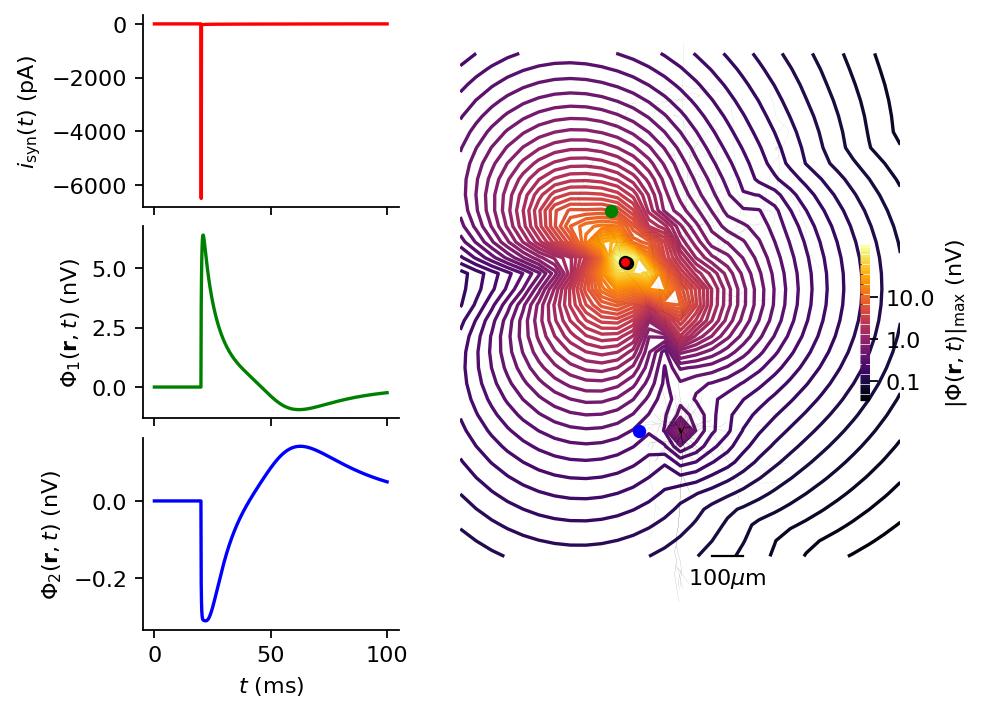

In [11]:
fig = plt.figure(dpi=160)

ax = fig.add_axes([0.4, 0.1, 0.55, 0.8], aspect="equal", frameon=False)
cax = fig.add_axes([0.85, 0.4, 0.01, 0.2], frameon=False)

LFP = np.max(np.abs(grid_electrode.data), 1).reshape(X.shape)
im = ax.contour(X, Z, np.log10(LFP), 50, cmap="inferno", zorder=-2)
# im = ax.contour(X, Z, LFP, 50, cmap="inferno", zorder=-2)
cbar = fig.colorbar(im, cax=cax)
cbar.set_label("$|\Phi(\mathbf{r}, t)|_\mathrm{max}$ (nV)")
cbar.outline.set_visible(False)

# get some log-linear tickmarks and ticklabels
ticks = np.arange(np.ceil(np.log10(LFP.min())), np.floor(np.log10(LFP.max())))
cbar.set_ticks(ticks)
cbar.set_ticklabels(np.round(10.0 ** ticks * 1e6, decimals=1))  # mV -> nV

# plot morphology
zips = []
for x, z in cell.get_idx_polygons():
    zips.append(list(zip(x, z)))
polycol = PolyCollection(zips, edgecolors="none", facecolors="k")
ax.add_collection(polycol)

ax.plot([100, 200], [-400, -400], "k", lw=1, clip_on=False)
ax.text(150, -470, r"100$\mu$m", va="center", ha="center")

ax.axis("off")


ax.plot(
    cell.x[cell.synidx],
    cell.z[cell.synidx],
    "o",
    ms=5,
    markeredgecolor="k",
    markerfacecolor="r",
)

color_vec = ["blue", "green"]
for i in range(2):
    ax.plot(
        point_electrode_parameters["x"][i],
        point_electrode_parameters["z"][i],
        "o",
        ms=6,
        markeredgecolor="none",
        markerfacecolor=color_vec[i],
    )

plt.axes([0.15, 0.10, 0.25, 0.25])
plt.plot(cell.tvec, point_electrode.data[0] * 1e6, color=color_vec[0], clip_on=False)
plt.ylabel(r"$\Phi_2(\mathbf{r},t)$ (nV)")
plt.xlabel(r"$t$ (ms)")
plt.axis("tight")
ax = plt.gca()
for loc, spine in ax.spines.items():
    if loc in ["right", "top"]:
        spine.set_color("none")
ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("left")


plt.axes([0.15, 0.375, 0.25, 0.25])
plt.plot(cell.tvec, point_electrode.data[1] * 1e6, color=color_vec[1], clip_on=False)
plt.ylabel(r"$\Phi_1(\mathbf{r}, t)$ (nV)")
plt.axis("tight")
ax = plt.gca()
for loc, spine in ax.spines.items():
    if loc in ["right", "top"]:
        spine.set_color("none")
ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("left")
ax.set_xticklabels([])

plt.axes([0.15, 0.65, 0.25, 0.25])
plt.plot(cell.tvec, synapse.i * 1e3, color="red", clip_on=False)
plt.ylabel(r"$i_\mathrm{syn}(t)$ (pA)")
plt.axis("tight")
ax = plt.gca()
for loc, spine in ax.spines.items():
    if loc in ["right", "top"]:
        spine.set_color("none")
ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("left")
ax.set_xticklabels([])